(exploratory)=
# Ejemplo de análisis exploratorio

Fuente:
    [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

Descarga: 
    [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

Resumen:
    Los datos provinen de llamadas telefónicas de campañas de marketing de un banco portugués. El objetivo es clasificar si el cliente se subscribirá a un depósito a largo plazo (clasificación binaria)


---
## Carga de datos

In [65]:
import os
import urllib
import zipfile

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy.stats as ss

plt.style.use("seaborn")
pd.set_option('display.max_columns', 500)
%config InlineBackend.figure_format='retina'

In [66]:
working_dir = "."
download_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
bank_path = "data/bank"
raw_data_rel_path = "data/data_raw"
zip_path = "bank-additional/bank-additional-full.csv"
raw_data_path = os.path.join(working_dir, raw_data_rel_path)

In [67]:
def fetch_data(
    download_url: str,
    raw_data_path: str,
    bank_path: str,
    zip_path: str
) -> None:
    os.makedirs(raw_data_path, exist_ok=True)
    zip_file_path = os.path.join(raw_data_path, "data.zip")
    urllib.request.urlretrieve(download_url, zip_file_path)
    with zipfile.ZipFile(zip_file_path) as zip_ref:
        zip_ref.extract(
            zip_path,
            bank_path
        )

def load_data(bank_path: str, zip_path: str) -> pd.DataFrame:
    csv_path = os.path.join(bank_path, zip_path)
    df = pd.read_csv(csv_path, sep=";")
    return df

In [68]:
fetch_data(download_url, raw_data_path, bank_path, zip_path)

In [69]:
bank = load_data(bank_path, zip_path)

In [70]:
# funciones auxiliares
# variables globales: bank: pd.DataFrame, mask: pd.Series

def create_hist_plot(col: str, ax: plt.Axes, bins: int=None, df: pd.DataFrame=bank) -> None:
    if bins is None:
        bins_total = df[col].max() - df[col].min()
        bins_yes = df.loc[mask][col].max() - df.loc[mask][col].min()
        bins_no = df.loc[~mask][col].max() - df.loc[~mask][col].min()
    else:
        bins_total, bins_no, bins_yes = bins, bins, bins
    ax.hist(x=df[col], bins=bins_total, label="total", align="left")
    ax.hist(x=df.loc[~mask][col], bins=bins_no, label="y=no", alpha=0.5, align="left")
    ax.hist(x=df.loc[mask][col], bins=bins_yes, label="y=yes", alpha=0.5, align="left")
    ax.set_title("Histograma " + col)
    ax.legend()

def create_bar_plot(col: str, ax: plt.Axes, df: pd.DataFrame=bank) -> None:
    ax.bar(
        df.loc[~mask][col].drop_duplicates(),
        df[col].value_counts(dropna=False), 
        label="no"
    )
    ax.bar(
        df.loc[mask][col].drop_duplicates(),
        df.loc[mask][col].value_counts(dropna=False), 
        label="yes"
    )
    ax.tick_params(axis="x", labelrotation=45)
    ax.set_title(col)
    ax.legend()

def describe_num_col(col: str, df: pd.DataFrame=bank) -> pd.DataFrame:
    df_describe = pd.DataFrame(
        [
            df[col].describe(), 
            df.loc[mask][col].describe(),
            df.loc[~mask][col].describe()
        ], 
        index=["total", "y=yes", "y=no"]
    )
    return df_describe

def create_corr_mat_plot(corr_matrix, ax: plt.Axes) -> None:    
    sns.heatmap(corr_matrix, annot=True, ax=ax, linewidths=0.2, fmt=".2f")
    ax.set_title("Matrix de correlación variables numéricas")
        
def cramers_v(x: pd.Series, y: pd.Series) -> np.ndarray:
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [71]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


---
## Análisis exploratorio de datos

Partimos de la siguientes descripciones de lo que represeta cada columna:
- **Datos del cliente**
    - `age`: edad del candidato
    - `job`: tipo de trabajo el candidato
    - `marital`: estado civil
    - `education`: nivel educativo
    - `default`: ¿Tiene incumplimientos en algún crédito?
    - `housing`: ¿Tiene una hipoteca?
    - `loan`: ¿Tiene un crédito personal?
- **Datos relacionados con el último contacto de la campaña**
    - `contact`: canal de comunicicación de los contactos con el cliente
    - `month`: mes del último contacto en el presente año
    - `day_of_week`: día de la semana del último contacto en el presente año
    - `duration`: duración de la última comunicación en segundos
- **Historial de contactos**
    - `campaign`: número de contactos realizados durante la campaña con el cliente
    - `pdays`: número de días que pasaron desde que el cliente fue contactado en una anterior campaña. Si no hubo contacto, vale `999`
    - `previous`: número de contactos realizados con el cliente antes de esta campaña
    - `poutcome`: resultado de la anterior campaña
- **Variables socioeconómicas**
    - `emp.var.rate`: tasa de variación de empleo (indicador cuatrimestral)
    - `cons.price.idx`: índice de precios de consumo (indicador mensual)
    - `cons.conf.idx`: índice de confianza del consumidor (indicador mensual)
    - `euribor3m`: tasa euribor a 3 meses (indicador diario)
    - `nr.employed`: número de ocupados (indicador cuatrimestral, en miles)
- **Variable objetivo**
    - `y`: ¿Ha contratado el cliente un depósito a largo plazo? 

Utilizamos el método `info` de pandas para obtener información sobre las columnas del dataset
- nombre
- conteo de no nulos
- tipo

In [72]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Pandas ha detectado un total de 41188 filas, 20 columnas (19 variables regresoras y 1 variable objetivo). Los tipos inferidos han sido 
- 5 de tipo flotante 
- 5 de tipo entero 
- 11 de tipo genérico

En principio, no ha detectado valores faltantes en ninguna de las variables.

Realizamos en primer lugar un análisis cuantitativo de las variables de las que disponemos en el dataset. Una vez tengamos claro cómo se estructuran los datos y su calidad, podremos entender mejor el dataset en su conjunto, y consecuentemente diseñar una herramienta de clasificación adecuada. 

Vamos a estudiar posibles valores nulos, conteos, distribuciones y posibles correlaciones con la variable objetivo.

### Variable objetivo: `y`

In [73]:
mask = bank["y"] == "yes"

In [74]:
bank["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [75]:
mask.mean()

0.11265417111780131

La variable `y` toma dos valores: `"yes"` el **11,26%** de las veces y `"no"` el resto. Trabajamos por lo tanto con **un dataset desbalanceado**.

### Variables del cliente: `age`, `job`, `marital`, `education`, `default`, `housing`, `loan`.

In [76]:
client_cols = ["age", "job", "marital", "education", "default", "housing", "loan"]

In [77]:
bank[client_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.2+ MB


In [78]:
client_num_cols = client_cols[0:1]
client_cat_cols = client_cols[1:]

Vamos a examinar en primer lugar las variables supuestamente categóricas. Utilizamos el método `value_counts` para realizar conteos.

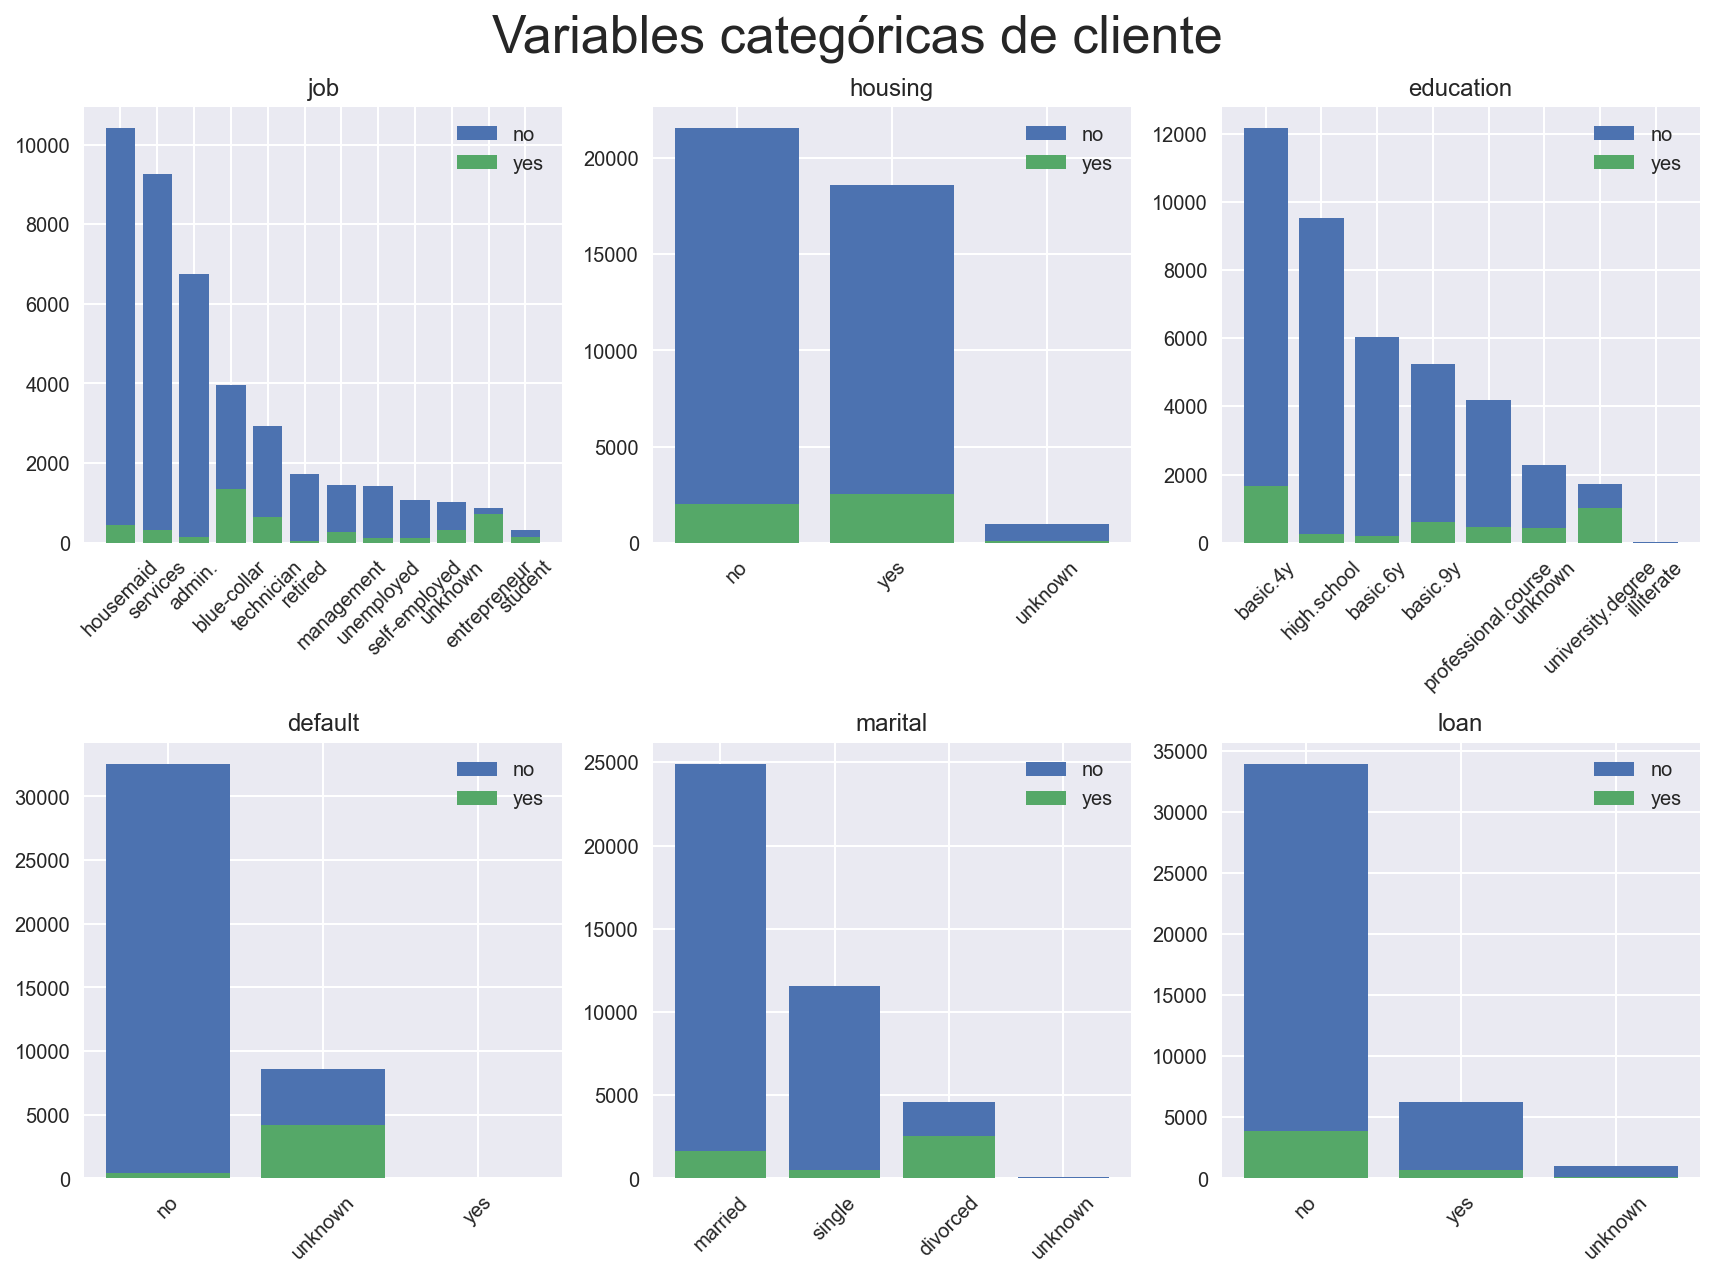

In [79]:
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows, n_cols, figsize=(12, 9))
for i, col in enumerate(client_cat_cols): 
    create_bar_plot(col, ax=ax[i%n_rows][i%n_cols])

fig.suptitle("Variables categóricas de cliente", fontsize=26)
fig.tight_layout()

Podemos observar que en efecto dichas variables representan categorías de a lo sumo 12 valores únicos. En todas ellas aparece la categoría minoritaria **unknown**, que tiene un peso importante en la variable `default`. Es notorio cómo cambia el porcentaje de instancias con `y=yes` cuando las variables `default`, `job` y `education` toman el valor de `unknown`. 

Sería interesante llegados a este punto pedir información sobre cómo se generan estos valores `unknown`, ya que a primera vista la distribución de `y` cambia cuando nos restringimos a este segmento del dataset. Podría ser el caso de que estas observaciones provinieran de otra fuente de datos o que el cliente no ha querido dar la información por algún motivo. 

Calculemos el porcentaje de valores con algún valor de `unknown`

In [112]:
unknown_mask = (
    bank["default"].isin(["unknown"]) 
    | bank["job"].isin(["unknown"]) 
    | bank["education"].isin(["unknown"]) 
)
unknown_mask.mean()

0.2403855491890842

Vamos ahora a estudiar la única variable numérica dentro de la categoría de variables de clientes. 

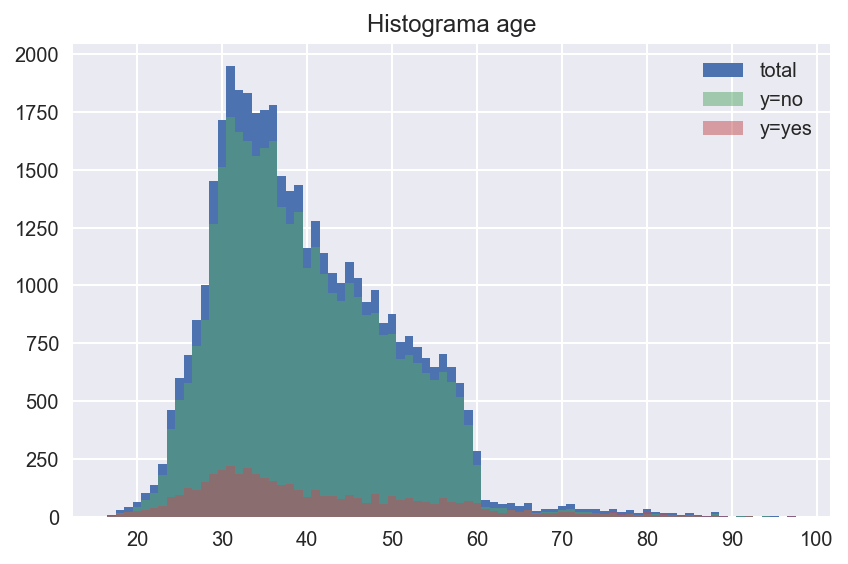

In [81]:
fig, ax = plt.subplots(figsize=(6, 4))
create_hist_plot("age", ax=ax)
fig.tight_layout()

Vemos valores de edad desde los 17 años hasta más de los 90, con un salto importante en la edad de jubilicación (en torno a los 60). Estudiemos media y algunos percentiles de la edad segmentando por positivos y negativos de la variable objetivo `y`.

In [82]:
describe_num_col("age")

,count,mean,std,min,25%,50%,75%,max
total,41188.0,40.024060,10.421250,17.0,32.0,38.0,47.0,98.0
y=yes,4640.0,40.913147,13.837476,17.0,31.0,37.0,50.0,98.0
y=no,36548.0,39.911185,9.898132,17.0,32.0,38.0,47.0,95.0


Tanto media como percentiles son parecidos, las observaciones positivas tienen un poco más de varianza.

### Variables relacionadas con el contacto con el cliente: `contact`, `month`, `day_of_week`, `duration`

In [83]:
contact_cols = ["contact", "month", "day_of_week", "duration"]

In [84]:
bank[contact_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   contact      41188 non-null  object
 1   month        41188 non-null  object
 2   day_of_week  41188 non-null  object
 3   duration     41188 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.3+ MB


In [85]:
contact_cat_cols = contact_cols[:-1]
contact_num_cols = contact_cols[-1:]

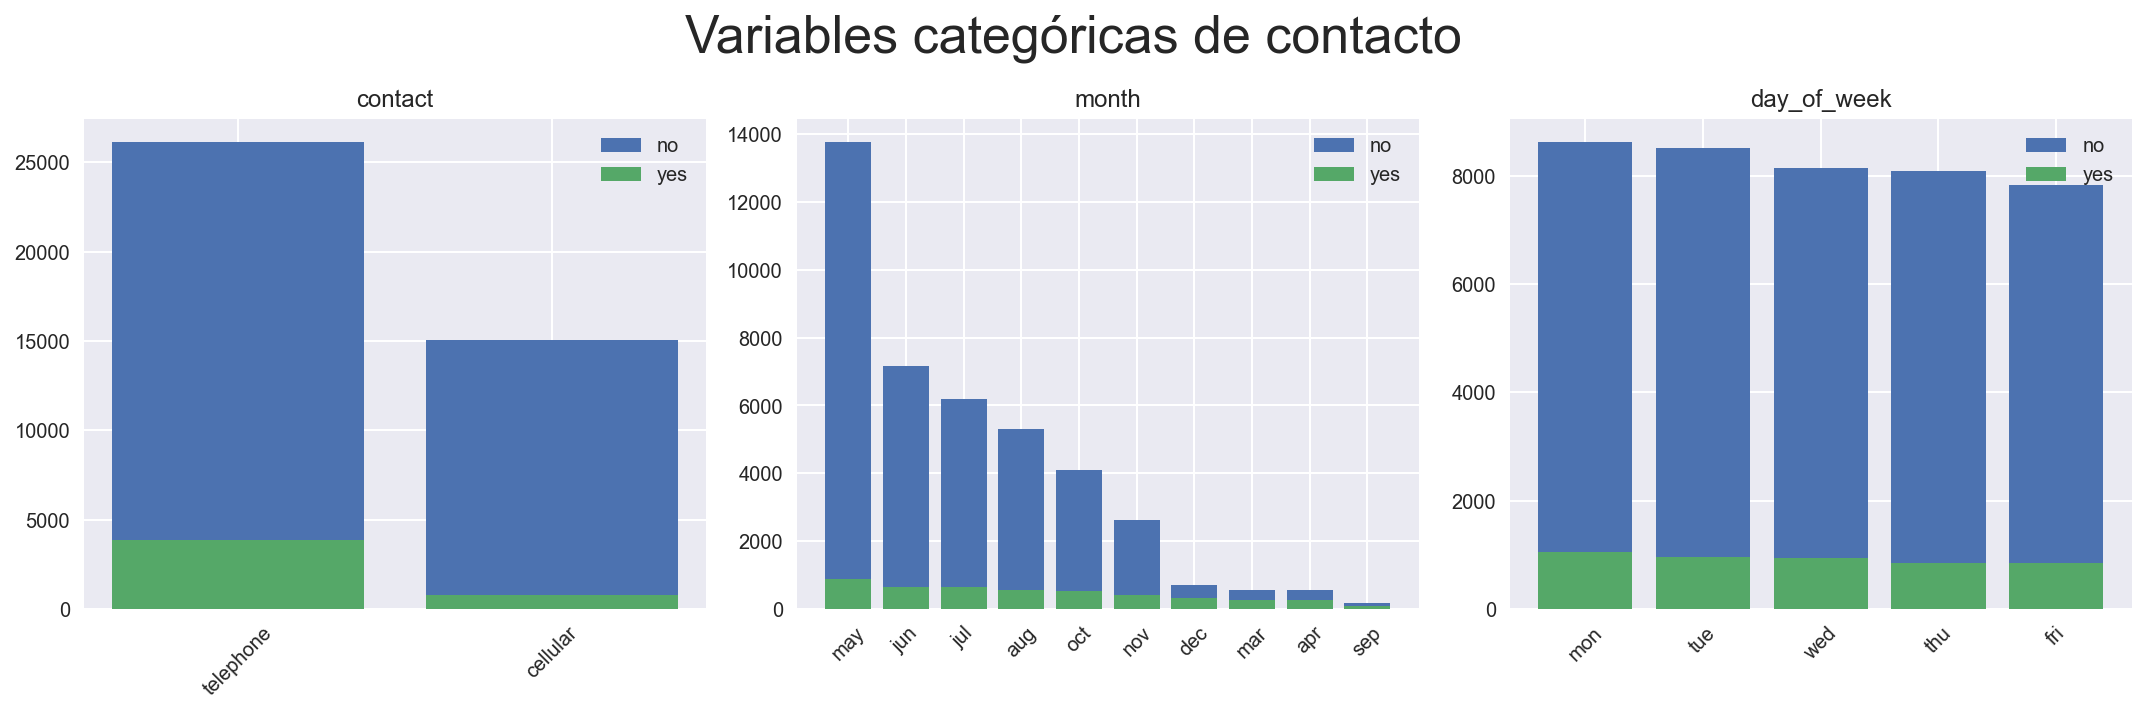

In [86]:
n_rows = 3
fig, ax = plt.subplots(1, n_rows, figsize=(15, 5))
for i, col in enumerate(contact_cat_cols): 
    create_bar_plot(col, ax=ax[i])

fig.suptitle("Variables categóricas de contacto", fontsize=26)
fig.tight_layout()

Notamos que 
- El método de contacto mayoritario es el móvil, casi con el doble de contactos. 
- Los meses de mayo, julio, agosto y junio son los que tienen mayor actividad durante las campañas
- El número de contactos por día de la semana es bastante uniforme
- La distribución de `y` **cambia radicalmente para los meses de diciembre, marzo, abril y septiembre**. Sería interesante saber por qué el número de contactos decrece en función de la época del año (campañas de marketing). Podría ser que durante los meses de no campaña, se contactará sólo con el cliente una vez el mismo se haya interesado, de ahí una tasa de positivos tan alta.

En cuanto a la variable `duration` obtenemos el siguiente histograma 

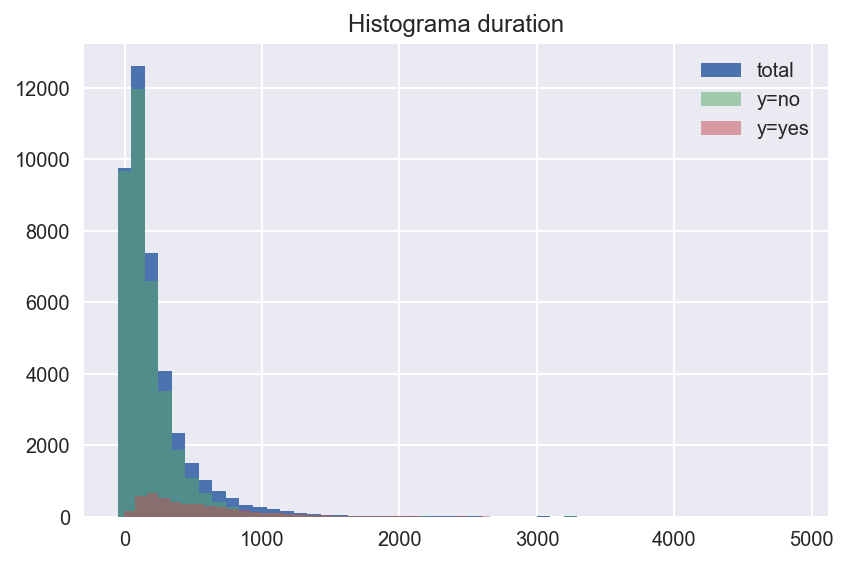

In [87]:
fig, ax = plt.subplots(figsize=(6, 4))

create_hist_plot("duration", bins=50, ax=ax)
fig.tight_layout()

In [88]:
describe_num_col("duration")

,count,mean,std,min,25%,50%,75%,max
total,41188.0,258.285010,259.279249,0.0,102.0,180.0,319.00,4918.0
y=yes,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0
y=no,36548.0,220.844807,207.096293,0.0,95.0,163.5,279.00,4918.0


Vemos que la media del tiempo de llamada cuando el cliente acaba contratando el depósito, como era de esperar. 

A pesar de ser una variable con un potencial prometedor para nuestra tarea, no podemos olvidar que si nuestro objetivo es utilizar el modelo para filtrar potenciales clientes y crear un listado que se le pase a un *call center*, **nunca vamos a disponer de `duration`**, ya que se informa su valor a futuro, una vez el listado está hecho. El resto de variables sobre el contacto (y resto de agrupaciones) sí estarían potencialmente disponibles a la hora de crear un listado.

### Variables del historial de contactos: `campaign`, `pdays`, `previous`, `poutcome`.

In [89]:
history_cols = ["campaign", "pdays", "previous", "poutcome"]

In [90]:
bank[history_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   campaign  41188 non-null  int64 
 1   pdays     41188 non-null  int64 
 2   previous  41188 non-null  int64 
 3   poutcome  41188 non-null  object
dtypes: int64(3), object(1)
memory usage: 1.3+ MB


#### `poutcome`

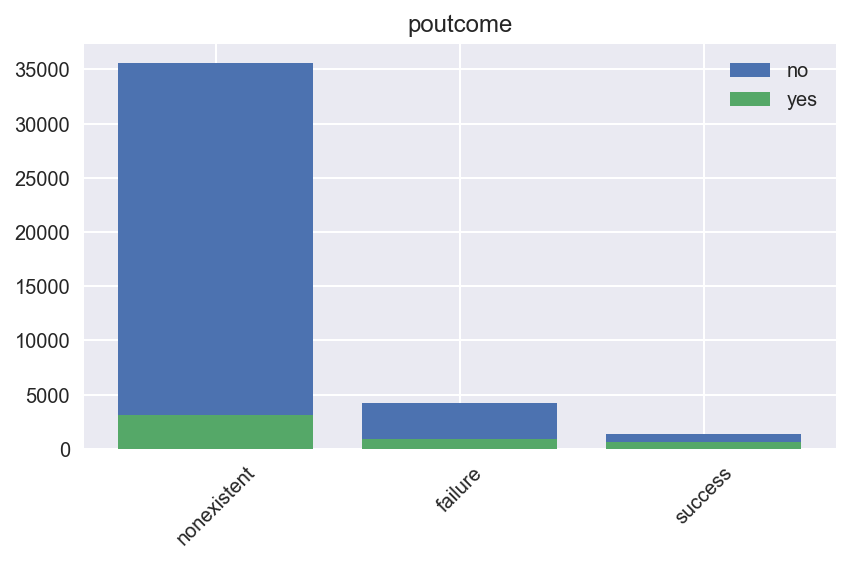

In [91]:
fig, ax = plt.subplots()
create_bar_plot("poutcome", ax=ax)

fig.tight_layout()

Observamos que la tasa de positivos es mucho mayor en clientes que ya han contratado un depósito a largo plazo. Veamos cuántos han repetido 

In [92]:
bank[bank["poutcome"] == "success"]["y"].value_counts()

yes    894
no     479
Name: y, dtype: int64

Vamos con las variables numéricas

#### `pdays`

In [93]:
describe_num_col("pdays")

,count,mean,std,min,25%,50%,75%,max
total,41188.0,962.475454,186.910907,0.0,999.0,999.0,999.0,999.0
y=yes,4640.0,792.035560,403.407181,0.0,999.0,999.0,999.0,999.0
y=no,36548.0,984.113878,120.656868,0.0,999.0,999.0,999.0,999.0


In [94]:
bank["pdays"].value_counts(normalize=True).iloc[:3]

999    0.963217
3      0.010658
6      0.010003
Name: pdays, dtype: float64

Vemos que la variable `pdays` tiene la mayoría de sus valores en `999` (> 96%), que se corresponde con que el cliente no ha sido contactado en la anterior campaña. Veamos que pinta tiene el histograma del aquellas observaciones que sí tengan registro en `pdays`

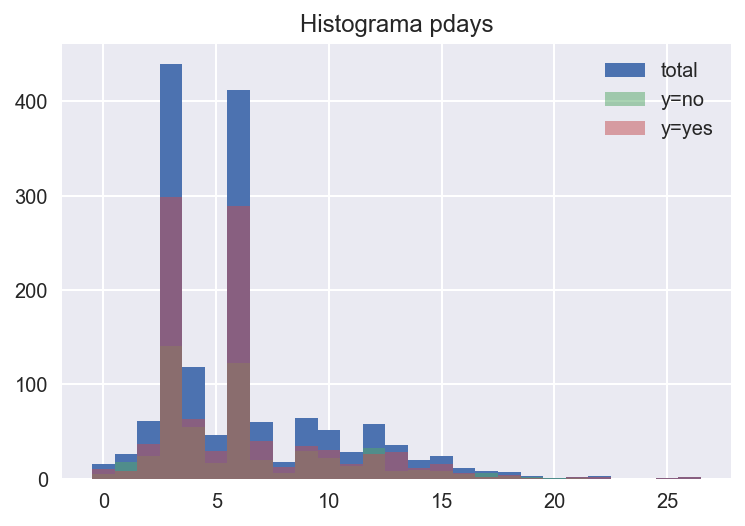

In [95]:
fig, ax = plt.subplots()
create_hist_plot("pdays", ax=ax, df=bank[bank["pdays"] < 999])

Se puede apreciar que el cliente es contactado de nuevo tras 3 o 6 días en la misma campaña. Aquellos a los que se contacta varias veces parecen tener una tasa de positivos alta 

In [96]:
bank[bank["pdays"] < 999]["y"].value_counts()

yes    967
no     548
Name: y, dtype: int64

Parece una buena idea crear una variable binaria a partir de `pdays` que indique si el cliente ha sido contactado con anterioridad en otra campaña (`pdays < 999`).

#### `previous`

Exploremos `previous`, que se define como `campaign` pero cuenta contactos realizados *antes* de la campaña actual

In [97]:
describe_num_col("previous")

,count,mean,std,min,25%,50%,75%,max
total,41188.0,0.172963,0.494901,0.0,0.0,0.0,0.0,7.0
y=yes,4640.0,0.492672,0.860344,0.0,0.0,0.0,1.0,6.0
y=no,36548.0,0.132374,0.409199,0.0,0.0,0.0,0.0,7.0


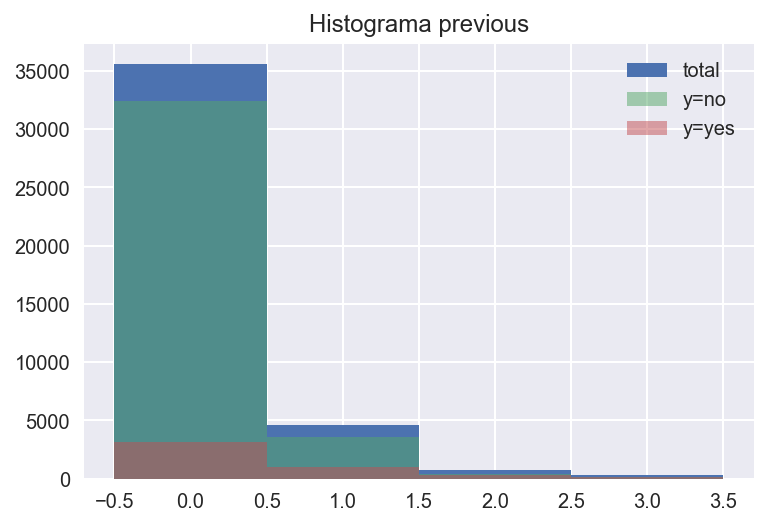

In [98]:
# campaign
fig, ax = plt.subplots()
create_hist_plot("previous", ax=ax, df=bank[bank["previous"] < 5])

Destaca que el valor medio de `previous` en los positivos es más del doble que en los negativos. 

Llegados a este punto sería interesante saber si la información de `poutcome`, `previous`, `pdays` es coherente, en el sentido de que si `poutcome = "nonexistent"`, es decir, el cliente no ha participado en campañas anteriores, entonces `previous` tiene que valer 1 y `pdays` debe ser 999.

In [99]:
bank[["poutcome", "previous", "pdays"]].value_counts(normalize=True).sort_values(ascending=False)

poutcome     previous  pdays
nonexistent  0         999      0.863431
failure      1         999      0.089735
             2         999      0.008473
success      1         3        0.006070
                       6        0.005341
                                  ...   
             2         17       0.000024
failure      4         3        0.000024
             2         19       0.000024
             3         3        0.000024
success      7         3        0.000024
Length: 120, dtype: float64

Vemos que dicha hipótesis se cumple, sim embargo `pdays` puede valer 999 incluso cuando `poutcome` y `previous` están informados. Parece que las tres variables codifican información similar, luego sería interesante ver la correlación con la variable objetivo y elegir una de ellas. Dado que ambas son categóricas, utilizamos el [coeficiente V de Cramér](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V)

In [100]:
cols = ["poutcome", "previous", "pdays"]
pd.DataFrame(
    [cramers_v(bank[col], bank["y"]) for col in cols], 
    index=cols, 
    columns=["V de Cramér"]
)

,V de Cramér
poutcome,0.320416
previous,0.235922
pdays,0.328857


Tendría sentido por lo tanto quedarnos con `poutcome` o con `pdays`.

#### `campaign`

In [101]:
describe_num_col("campaign")

,count,mean,std,min,25%,50%,75%,max
total,41188.0,2.567593,2.770014,1.0,1.0,2.0,3.0,56.0
y=yes,4640.0,2.051724,1.666245,1.0,1.0,2.0,2.0,23.0
y=no,36548.0,2.633085,2.873438,1.0,1.0,2.0,3.0,56.0


El mínimo de la variable es 1, por lo que deducimos que **el contacto que se está informando en la fila se cuenta**. Más de 75% tiene menos de 3 contactos en la campaña. Notemos también que **la media de contactos en las personas que acaban contratando es menor**.

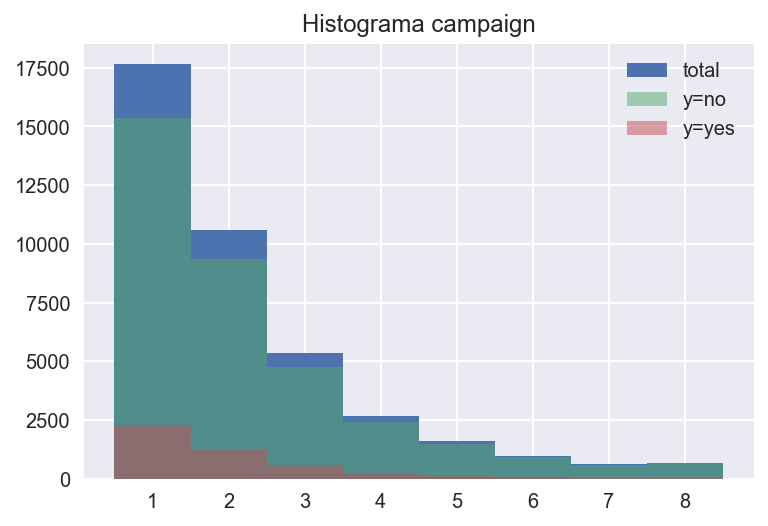

In [102]:
# campaign
fig, ax = plt.subplots()
create_hist_plot("campaign", ax=ax, df=bank[bank["campaign"] < 10])

In [103]:
cramers_v(bank["campaign"], bank["y"])

0.06571461554226031

### Variables socioeconómicas: `emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`

In [104]:
economic_cols = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

In [105]:
bank[economic_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   emp.var.rate    41188 non-null  float64
 1   cons.price.idx  41188 non-null  float64
 2   cons.conf.idx   41188 non-null  float64
 3   euribor3m       41188 non-null  float64
 4   nr.employed     41188 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


In [106]:
for col in economic_cols:
    print(f"Número de valores únicos en {col}: {bank[col].nunique()}")

Número de valores únicos en emp.var.rate: 10
Número de valores únicos en cons.price.idx: 26
Número de valores únicos en cons.conf.idx: 26
Número de valores únicos en euribor3m: 316
Número de valores únicos en nr.employed: 11


Podemos observar que 
- `emp.var.rate` y `nr.employed` son indicadores cuatrimestrales
- `cons.price.idx` y `cons.conf.idx` son anuales
- `euribor3m` es diario

Deducimos que el histórico se corresponde con 2 años y algunos meses, aunque como hemos visto los meses de enero y febrero no tienen registros.

## Correlaciones

### Entre variables numéricas

Calculamos el [coeficiente de correlación de Pearson](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson) entre cada par de atributos numéricos

In [107]:
bank["y_num"] = mask
corr_matrix = bank.corr()
corr_matrix

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_num
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


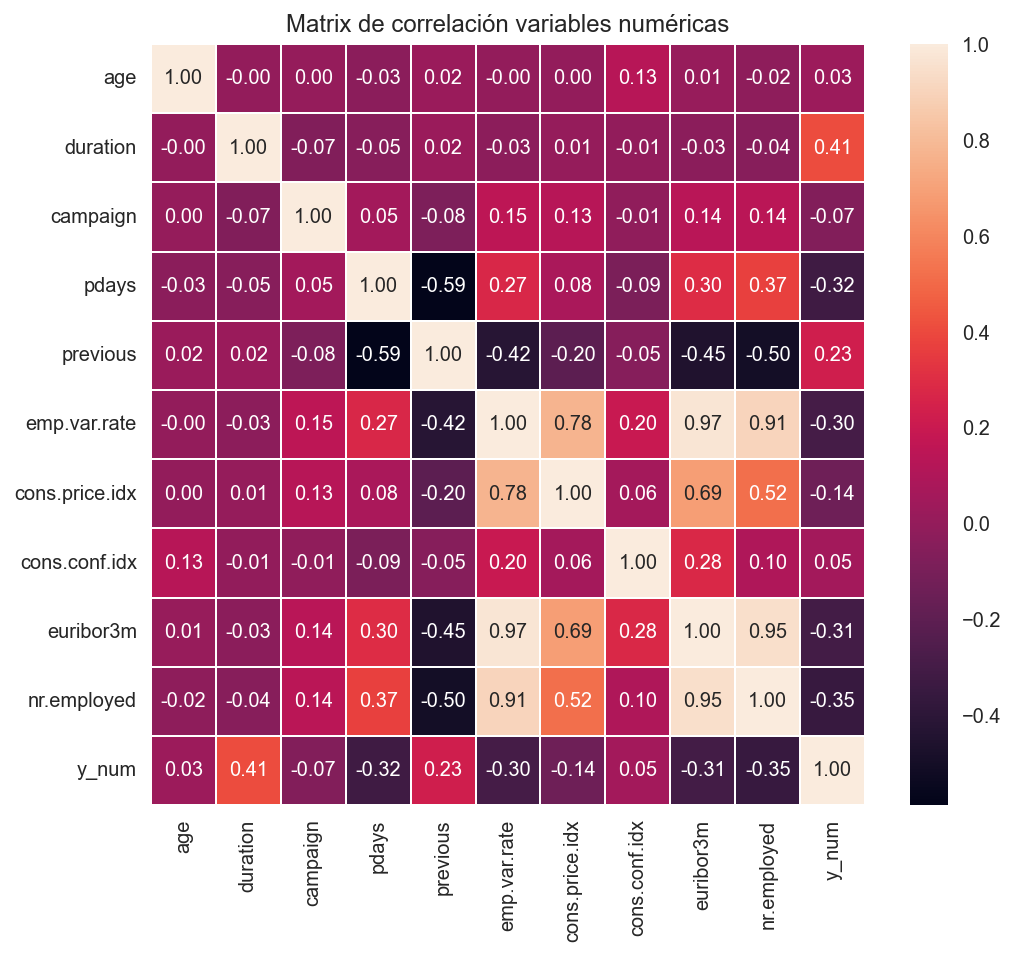

In [108]:
fig, ax = plt.subplots(figsize=(8, 7))

create_corr_mat_plot(corr_matrix, ax=ax)

Destacan
- Una correlación positiva entre algunas de las variables socioeconómicas. 
- La variable `previous` tiene una correlación negativa con las variables socioeconómicas. Destaca el coeficiente negativo del par `previous`-`pdays`

### Variables categóricas 

Utilizamos de nuevo el coeficiente V de Cramér

In [109]:
cat_cols = bank.select_dtypes("object").columns.drop("y")

v = dict()
for col in cat_cols:
    v[col] = cramers_v(bank[col], bank["y"])

In [110]:
cramers_v(bank["loan"], bank["y"])

0.0

In [111]:
v = pd.Series(v).sort_values()
v

loan           0.000000
housing        0.009458
day_of_week    0.023188
marital        0.053900
education      0.067220
default        0.099111
contact        0.144611
job            0.151893
month          0.274000
poutcome       0.320416
dtype: float64